11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 57ms/step - accuracy: 0.8816 - loss: 0.3873 - val_accuracy: 0.9791 - val_loss: 0.0645
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.9824 - loss: 0.0593 - val_accuracy: 0.9883 - val_loss: 0.0340
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9891 - loss: 0.0358 - val_accuracy: 0.9874 - val_loss: 0.0359
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9878 - val_loss: 0.0381
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9938 - loss: 0.0212 - val_accuracy: 0.9897 - val_loss: 0.0328
313/313 - 3s - 10ms/step - accuracy: 0.9897 - loss: 0.0328

✅ Test accuracy: 0.9897


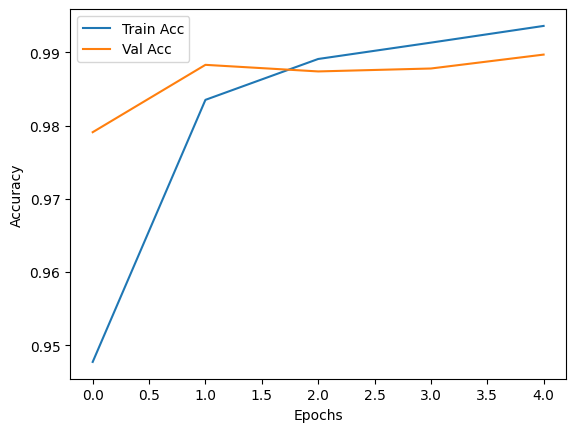

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# 2. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes for digits 0–9
])
# 3. Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 4. Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test))

# 5. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n Test accuracy: {test_acc:.4f}")

# 6. Plot training history (optional)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
'''Add Batch Normalization, Dropout layers, model summary
Compute Precision, recall and F1-Score. plot confusion matrix'''